# Spaceship Titanic 🚀

<div align="center">
    <img src='https://pic2.zhimg.com/v2-768b110090ef51c582c2f846adcb689a_r.jpg?source=172ae18b' style='height:100px;'>
</div>


## Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones 

## Aprendizaje Supervisado

**Grupo 5  
Integrantes:**

    Argüello, Leandro Ismael
    Corral, Diego
    Racciatti, Florencia
    Rinaudo, Eleana
    Romero, Ernesto

>#### Se busca realizar la prediccion de cuantos pasajeros fueron transportados a otra dimension cuando la nave accidentalmente ingreso a la anomalia espacio-temporal.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('talk')
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    plot_confusion_matrix,
    classification_report,
)
from sklearn.model_selection import (
    train_test_split,
    ParameterSampler,
    RandomizedSearchCV,
    ParameterGrid,
    GridSearchCV,
)

#### Carga de datos de train

In [4]:
train_url = r"https://raw.githubusercontent.com/eleanarinaudo/Diplo2022_Grupo-5/main/Notebooks/Aprendizaje%20Supervisado/data/test.csv"
train = pd.read_csv(train_url)
print(train.shape)
train.head()

(870, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,415,Europa,True,NaN,55 Cancri e,34.0,False,0.0,0.0,0.0,0.0,0.0,Minopus Taptiritty
1,8663,Earth,True,G/1489/S,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,Chrisa Francock
2,4524,Earth,False,G/776/P,TRAPPIST-1e,44.0,False,22.0,1.0,0.0,864.0,0.0,Elinda Miley
3,8246,Earth,False,E/577/S,PSO J318.5-22,63.0,False,0.0,0.0,80.0,0.0,2322.0,Karley Goods
4,2935,Europa,False,B/117/S,55 Cancri e,10.0,False,0.0,0.0,0.0,0.0,0.0,Arkard Sechausive


_________________________________________________________

## Analisis de correlacion de las variables de 'train'.

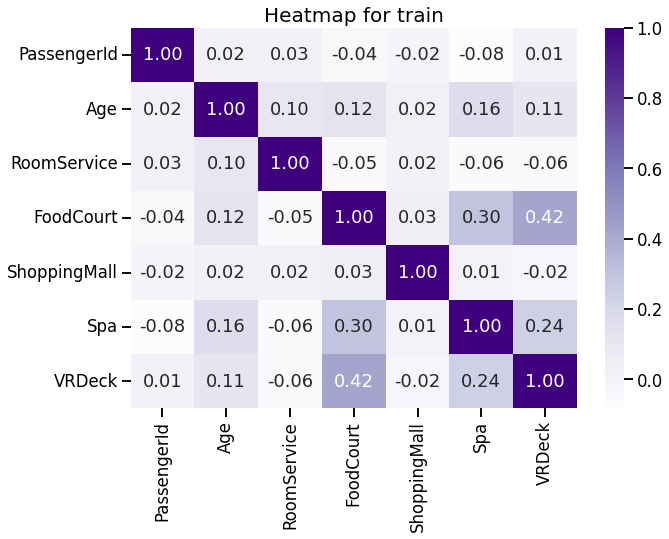

In [5]:
plt.rcParams['figure.figsize'] = (10, 7)
sns.heatmap(train.corr(), annot = True, fmt = ".2f", cmap = 'Purples')
plt.title('Heatmap for train', fontsize = 20)
plt.show()

>**Se observan ciertas correlaciones aunque nada demasiado significativo, un maximo de -0.25.**

## Observamos nulos y su porcentaje dentro de cada columna asi como en el total.

In [6]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, round(percent,3)], axis = 1, keys = ['Total_nuls_train', 'Percent'])
missing_data.style.background_gradient(subset = ["Percent"])

,Total_nuls_train,Percent
FoodCourt,28,0.032000
RoomService,27,0.031000
Spa,25,0.029000
HomePlanet,22,0.025000
Destination,22,0.025000
CryoSleep,21,0.024000
ShoppingMall,20,0.023000
VIP,19,0.022000
VRDeck,19,0.022000
Age,17,0.020000


In [7]:
total_nuls = missing_data.Total_nuls_train.sum()
perc_nuls = (total_nuls * 100)/len(train)
print(' Total de nulos en train: ',total_nuls,'\n Porcentaje de nulos en train: ',round(perc_nuls,2))

 Total de nulos en train:  251 
 Porcentaje de nulos en train:  28.85


>**Basandonos en que el numero de datos nulos total representa un 26.5% del total d datos de train, es posible que tengamos que imputar datos.** 

## Analisis exploratorio de variables de 'train'.

In [8]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [9]:
train.dtypes

PassengerId       int64
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

In [10]:
plt.rcParams['figure.figsize'] = (7, 5)

In [ ]:
#Cabin
train.Cabin.value_counts()

## Analisis descriptivo de variables que no seran graficadas.  
> Las variables **CryoSleep** y **VIP** son de tipo booleano.  
> La variable **Cabin** representa el numero de cabina con el detalle de si es en babor(P) o estribor(S).  
> La variable **Name** representa el nombre completo del pasajero.  
> La variable **PassengerId** representa el id del pasajero.  

**Analisis de variables referidas al monto que el pasajero ha facturado en cada uno de los muchos servicios de lujo del Spaceship Titanic.**

In [ ]:
sns.boxenplot(train.RoomService,showfliers=False);

In [ ]:
sns.boxenplot(train.FoodCourt,showfliers=False);

In [ ]:
sns.boxenplot(train.ShoppingMall,showfliers=False);

In [ ]:
sns.boxenplot(train.Spa,showfliers=False);

In [ ]:
sns.boxenplot(train.VRDeck ,showfliers=False);

## Algunas observaciones


>*A partir de las observaciones realizadas sobre los datos, podemos decir que las variables correspondientes al grupo de Servicios de lujo del Spaceship Titanic, contiene datos un poco desbalanceados con Outliers.  
>*A demas las variables **CryoSleep** y **VIP** son del tipo booleano, por lo cual probablemente deban descartarse o ser reemplazadas por valores numericos como 0 y 1.  
>*Las columnas categoricas Homeplanet y Destination aportan una posible clasificacion del target.  
>*La columna Cabin puede ser usada para generar nuevas features.


## Posibles acciones
  
>*Usar metodo de imputacion de valores faltantes a los nulos de cada variable.  
*Probar una limpieza de outliers de las columnas de montos en lujos.  
*Codificar las variables categoricas.  
*Con respecto a las dos variables tipo boolean, ver si combiene codificarlas o transformarlas en 0 y 1.  
*elegir columnas a excluir como por Name y PassengerId.  

__________

____________

### Columnas elegidas para el analisis en 'Train'.

Creemos que las siguientes columnas aportan informacion util para la clasificacion y caracterizacion de los pasajeros en el analisis del problema.  
**Columnas elegidas:**

In [ ]:
['HomePlanet','CryoSleep','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Cabin']

Columnas eliminadas debido a que contienen datos que son unicos o keys.

In [ ]:
train = train.drop(columns = ['Name','PassengerId'])

In [ ]:
train.shape

### Tratamiento de la variable 'Cabin' y generacion de nuevas features en 'Train'.

In [ ]:
train['Cabin']

In [ ]:
new_features = train['Cabin'].str.split(pat="/",expand=True)

In [ ]:
new_features = new_features.rename(columns={0:'Deck_of_spaceship',1:'Number_of_cabin',2:'Port_or_Starboard'})
new_features.head()

In [ ]:
#Eliminamos la columna 'Cabin' ya que las nuevas features aportan informacion con mas peso.
train = train.drop(columns='Cabin')

In [ ]:
train = train.join(new_features, lsuffix='_caller', rsuffix='_other')
train.head()

Nuevas features Agregadas:  
>Deck_of_spaceship : Cubierta  
>Number_of_cabin   : Numero de Cabina  
>Port_or_Starboard : S=Babor, P=Estribor  


_________

# Imputacion de valores nulos en 'Train' para las columnas numericas.

In [ ]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, round(percent,3)], axis = 1, keys = ['Total_nulls_test', 'Percent'])
missing_data.style.bar(subset = ["Percent"], 
             color = "lightblue", 
             vmin = 0)

In [ ]:
train.dtypes

In [ ]:
cat_cols = ['HomePlanet','CryoSleep','Destination','VIP','Deck_of_spaceship','Port_or_Starboard']
num_cols = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Number_of_cabin']

### Utilizando IterativeImputer imputamos valores faltantes de las columnas numericas de 'Train'.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())

train["Age"] = StandardScaler().fit_transform(
    train[["Age"]]
)
train["FoodCourt"] = StandardScaler().fit_transform(
    train[["FoodCourt"]]
)
train["RoomService"] = StandardScaler().fit_transform(
    train[["RoomService"]]
)
train["ShoppingMall"] = StandardScaler().fit_transform(
    train[["ShoppingMall"]]
)
train["Spa"] = StandardScaler().fit_transform(
    train[["Spa"]]
)
train["VRDeck"] = StandardScaler().fit_transform(
    train[["VRDeck"]]
)
train["Number_of_cabin"] = StandardScaler().fit_transform(
    train[["Number_of_cabin"]]
)
train[
    ["Age", "FoodCourt","RoomService","ShoppingMall","Spa","VRDeck","Number_of_cabin"]
] = mice_imputer.fit_transform(train[["Age", "FoodCourt","RoomService","ShoppingMall","Spa","VRDeck",
                                                   "Number_of_cabin"]])

In [ ]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, round(percent,3)], axis = 1, keys = ['Total_nulls_train', 'Percent'])
missing_data.style.bar(subset = ["Percent"], 
             color = "lightgreen", 
             vmin = 0)

>'Train' quedo sin valores nulos.

In [ ]:
train.head()

### Asignamos X e Y.

In [ ]:
y = train.Transported
X = train.drop('Transported',axis=1)
X.head(3)

### Usamos LabelEncoder para las columnas categoricas y escalamos

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_cols = cat_cols

for col in label_cols:
    X[col] = X[col].astype(str)
    X[col] = LabelEncoder().fit_transform(X[col])

### Usamos StandardScaler para escalar los datos.

In [ ]:
x_names = X.columns
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=x_names)
X.head()

### Dividimos en conjuntos de train y test.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state = 0 ) 

________________

________________________________________________________________________________________________________________________________

## XG BOOST

In [ ]:
import xgboost as xgb

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state = 0)

binary:hinge: hinge loss for binary classification. This makes predictions of 0 or 1, rather than producing probabilities.
Parametros:
n_estimators (int) – Number of boosting rounds.
max_depth 

In [ ]:
clf_xgb = xgb.XGBClassifier(objective= 'binary:hinge',
                            n_estimators= 29,
                            max_leaves= 60,
                            max_depth= 6,
                            random_state = 1, 
                            tree_method= 'approx'
                           )

clf_xgb.fit(x_train, y_train)

preds_xgb_train = clf_xgb.predict(x_train)
preds_xgb_test = clf_xgb.predict(x_test)

accuracy_xgb_train = float(np.sum(preds_xgb_train == y_train))/y_train.shape[0]
print('Train Accuracy de XGBoost: ', accuracy_xgb_train)

accuracy_xgb_test = float(np.sum(preds_xgb_test == y_test))/y_test.shape[0]
print('Test Accuracy de XGBoost: ', accuracy_xgb_test)


In [ ]:
plot_confusion_matrix(clf_xgb, x_test, y_test, cmap="magma");